In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing    #for normalizing
from sklearn.model_selection import train_test_split   
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_text

In [93]:
df = pd.read_csv("/content/drive/My Drive/5155-hw1/drug_consumption.data")

In [94]:
columns = ["ID","Age","Gender","Education","Country","Ethnicity","Nscore","Escore",
           "Oscore","Ascore","Cscore","Impulsive","SS","Alcohol","Amphet","Amyl",
           "Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin",
           "Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]

In [95]:
df.to_excel("/content/drive/My Drive/5155-hw1/drug_consumption.xlsx")

In [96]:
df.columns = columns

In [97]:
df.drop("ID",axis = 1,inplace = True)

In [98]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [37]:
#check with the data description to make sure the data is correct
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,0.034364,-0.000512,-0.003777,0.355221,-0.309808,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,0.878529,0.482588,0.950330,0.700382,0.165967,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [38]:
temp = df.loc[:,"Alcohol":"VSA"]

In [39]:
for c in temp:
  # print(c)
  temp[c].replace(['CL0','CL1'],'Non-user',inplace = True)
  temp[c].replace(['CL2','CL3','CL4','CL5','CL6'],'User',inplace = True)
  # for i in temp[c]:
    
  #   if i in ['CL0','CL1']:
  #     temp[c].replace(i,'Non-user',inplace = True)
  #   else:
  #     temp[c].replace(i,'User',inplace = True)

In [40]:
temp.describe()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
count,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
freq,1816,1206,1514,1116,1847,1265,1849,1197,1693,1133,1672,1534,1122,1327,1467,1190,1263,1878,1654


In [41]:
temp.to_csv("/content/drive/My Drive/5155-hw1/temp.csv")

In [42]:
df.loc[:,"Alcohol":"VSA"] = temp.loc[:,"Alcohol":"VSA"]

In [43]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,Non-user
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,Non-user,Non-user,Non-user,User,User,Non-user,Non-user,Non-user,Non-user,User
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,User,Non-user,Non-user,User,User,User,User,User,Non-user,Non-user
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user,Non-user
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,User,Non-user,Non-user,User,User,Non-user,User,User,Non-user,Non-user


In [73]:
X = df.loc[:,"Age":"SS"]

In [74]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


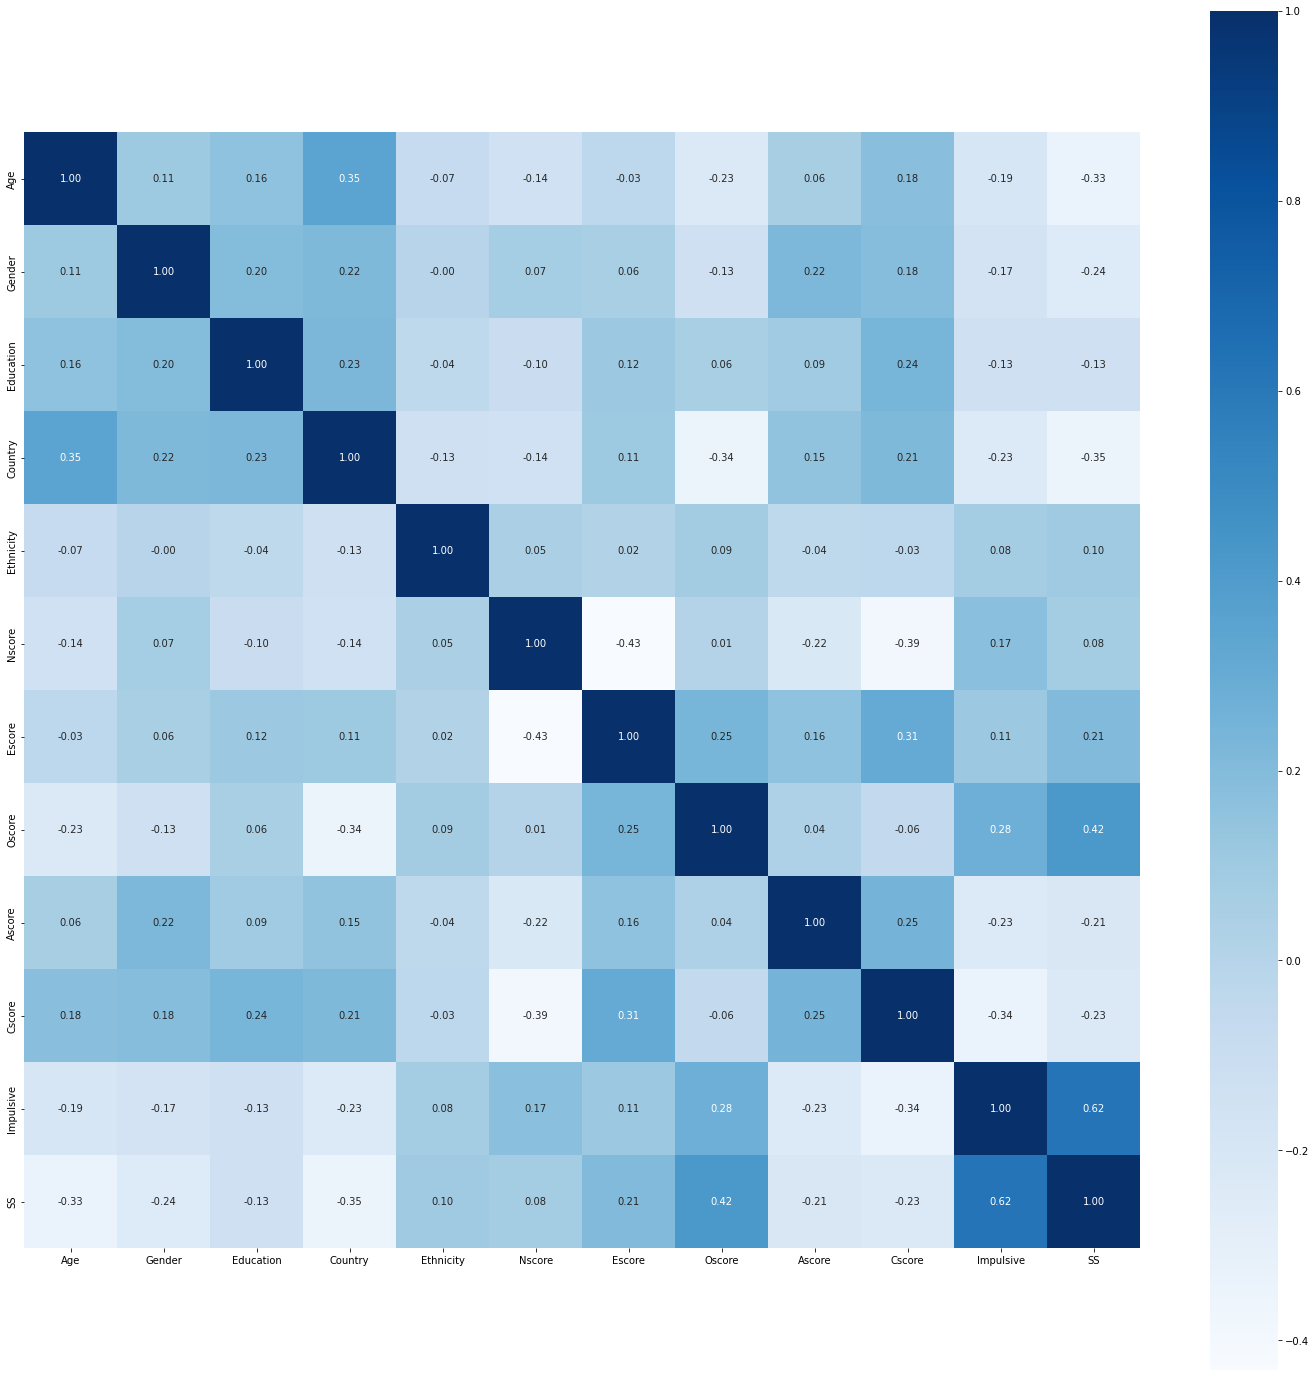

In [46]:
plt.figure(figsize = (25,25))
corr_values1 = X.corr() 
sns.heatmap(corr_values1, annot=True,vmax=1, square=True, cmap="Blues",fmt='.2f')

In [75]:
X.drop('SS',axis = 1,inplace = True)

In [76]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983
...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221


In [49]:
feature_names = X.columns.tolist()

In [50]:
feature_names

['Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Impulsive']

In [51]:
# labels = []
# for col in df.loc[:,'Alcohol':'VSA']:
#   labels.append(col)

In [52]:
labels = ['Cannabis']

In [53]:
df[labels].describe()

,Cannabis
count,1884
unique,2
top,User
freq,1265


In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983
...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221


dt confusion_matrix: [[303  66]
 [ 83 114]]
dt accuracy: 0.7367491166077739
dt Presion: [0.78497409 0.63333333]
dt Recall: [0.82113821 0.5786802 ]


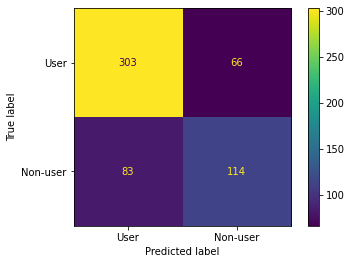

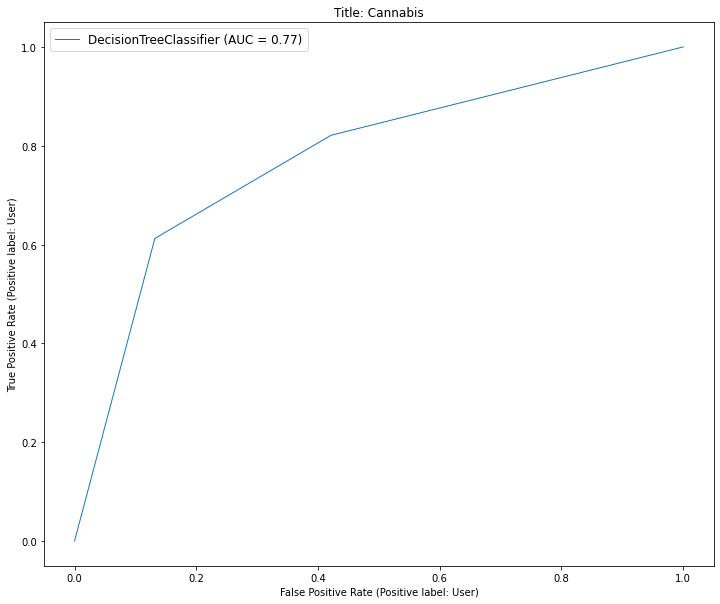

In [66]:
for i in range(len(labels)):
  y = df[labels[i]]
  X = preprocessing.scale(X)
  x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
  label = ['User','Non-user']


  #dt
  dt_clf = DecisionTreeClassifier(max_leaf_nodes=3,random_state=0)
  dt_clf.fit(x_train, y_train)
  y_pred_dt = dt_clf.predict(x_test)
  p_dt, r_dt, f_dt, support_dt=precision_recall_fscore_support(y_true=y_test, y_pred=y_pred_dt, labels=label)
  cm_dt = confusion_matrix(y_test, y_pred_dt, labels = label)

  print("dt confusion_matrix:",cm_dt)
  cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=label)
  cmd_dt.plot()
  
  print("dt accuracy:",dt_clf.score(x_test, y_test))
  print("dt Presion:",p_dt)
  print("dt Recall:",r_dt)

  #create plots
  fig,ax = plt.subplots(figsize=(12,10))
  plt.title("Title: " + labels[i])
  dt_roc = plot_roc_curve(estimator = dt_clf, X=x_test,
                        y=y_test, ax=ax, linewidth=1)

  
  #alter the size of characters
  ax.legend(fontsize=12)

  #show the ROC curve
  plt.show()

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [92]:
y_train.value_counts()

User        882
Non-user    436
Name: Cannabis, dtype: int64

In [78]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983
...,...,...,...,...,...,...,...,...,...,...,...
1879,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113
1880,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113
1881,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975
1882,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221


In [79]:
x_test

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive
830,1.09449,0.48246,1.98437,-0.57009,-0.31685,0.04257,0.16767,-0.01928,-0.76096,-0.78155,0.88113
91,-0.07854,-0.48246,-1.22751,0.96082,-0.31685,-1.55078,-0.30033,-0.45174,0.28783,-0.00665,-0.71126
316,1.09449,0.48246,-1.73790,0.96082,0.11440,0.31287,-0.30033,-1.27553,-0.15487,0.58489,0.88113
1773,1.09449,0.48246,-1.73790,0.96082,-0.31685,1.02119,-0.69509,-1.68062,-0.30172,-0.89891,1.86203
1178,-0.07854,-0.48246,-0.61113,-0.28519,-0.31685,1.72012,-0.43999,-0.58331,-0.45321,-1.01450,0.19268
...,...,...,...,...,...,...,...,...,...,...,...
1072,-0.95197,-0.48246,-1.43719,0.96082,-0.31685,-0.92104,-0.57545,0.72330,1.28610,-0.27607,-0.71126
1403,-0.07854,0.48246,1.16365,0.96082,-0.31685,-0.79151,0.80523,1.24033,1.28610,0.41594,0.19268
1457,1.82213,-0.48246,1.16365,0.96082,-0.31685,0.13606,0.63779,0.88309,0.28783,-0.78155,-0.71126
1872,-0.95197,-0.48246,-1.43719,-0.57009,-0.31685,0.73545,-1.23177,0.58331,-0.60633,-0.40581,0.52975


In [81]:
y_pred_dt = dt_clf.predict(x_test)

In [85]:
y_pred_dt = pd.Series(y_pred_dt)

In [86]:
y_pred_dt

0          User
1          User
2      Non-user
3      Non-user
4          User
         ...   
561        User
562        User
563    Non-user
564        User
565        User
Length: 566, dtype: object

In [87]:
y_test

830     Non-user
91      Non-user
316     Non-user
1773        User
1178        User
          ...   
1072        User
1403        User
1457    Non-user
1872        User
1880        User
Name: Cannabis, Length: 566, dtype: object

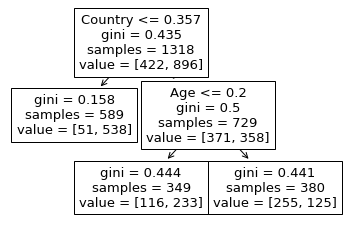

In [67]:
tree.plot_tree(dt_clf,feature_names = feature_names)
plt.show()

In [68]:
r = export_text(dt_clf,feature_names = feature_names)
print(r)

|--- Country <= 0.36
|   |--- class: User
|--- Country >  0.36
|   |--- Age <= 0.20
|   |   |--- class: User
|   |--- Age >  0.20
|   |   |--- class: Non-user

